# Importing and preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as  sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_excel('customer_churn_large_dataset.xlsx')

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.shape

(100000, 9)

data set has 100000 rows and 9 column 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [7]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [9]:
data=df.rename(columns={'Location_Los Angeles':'Location_Los_Angeles','Location_New York':'Location_New_York'})

as we see there is no null value 

# EDA

In [10]:
Churn= df['Churn'].value_counts().reset_index()
Churn.head()

,index,Churn
0,0,50221
1,1,49779


<AxesSubplot:xlabel='index', ylabel='Churn'>

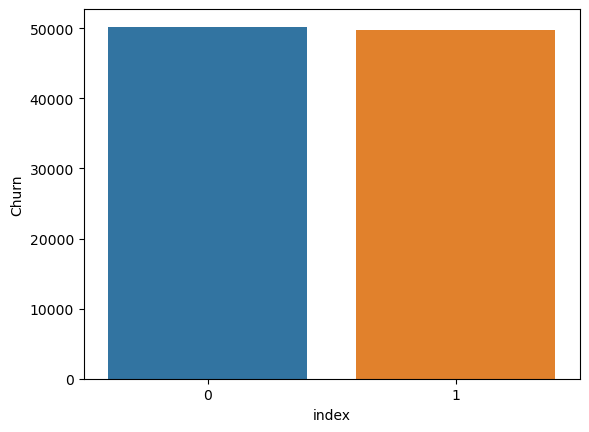

In [11]:
sns.barplot(x=Churn['index'],y=Churn['Churn'])

here we see this is balance dataset

<AxesSubplot:xlabel='Subscription_Length_Months', ylabel='Density'>

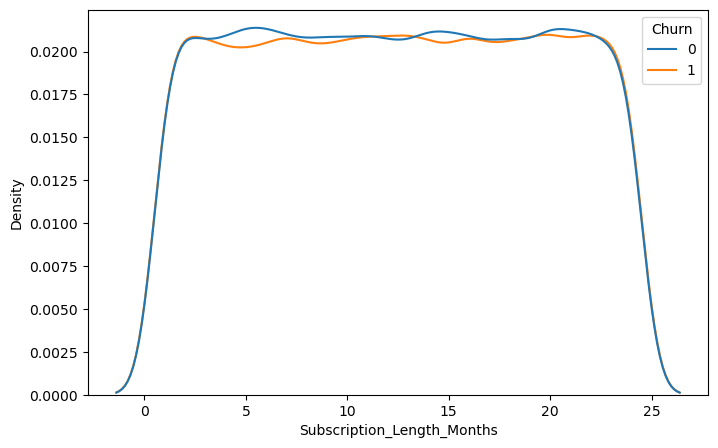

In [12]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['Subscription_Length_Months'],hue=df['Churn'])

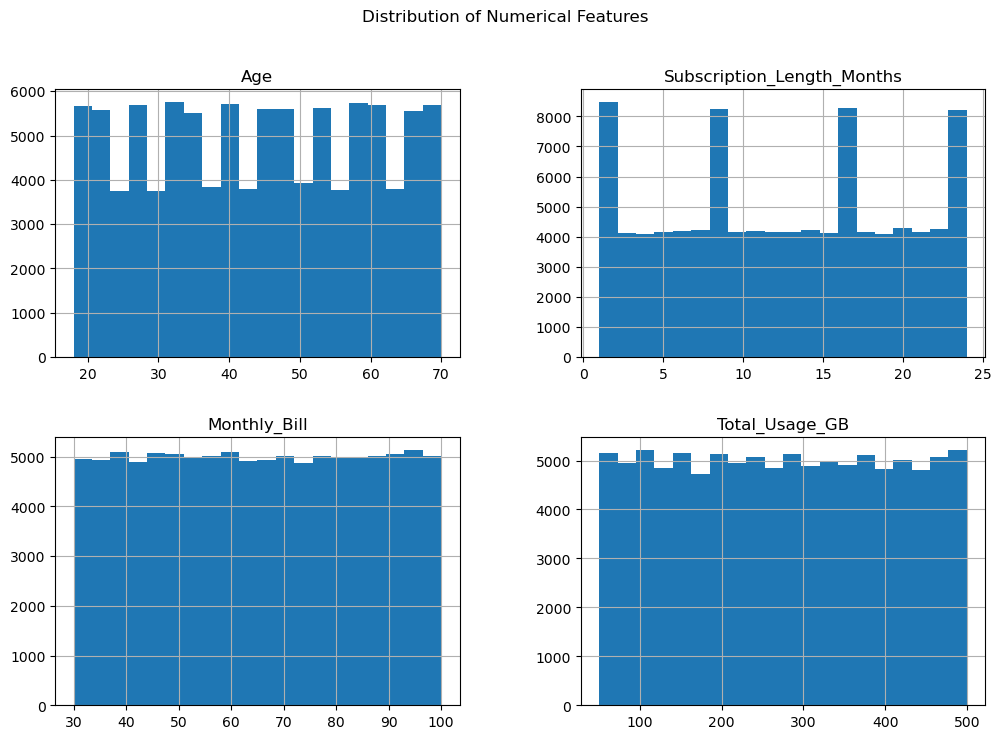

In [13]:
# Distribution of numerical features
numerical_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
df[numerical_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()


In [14]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [15]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

C:\Users\rushi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


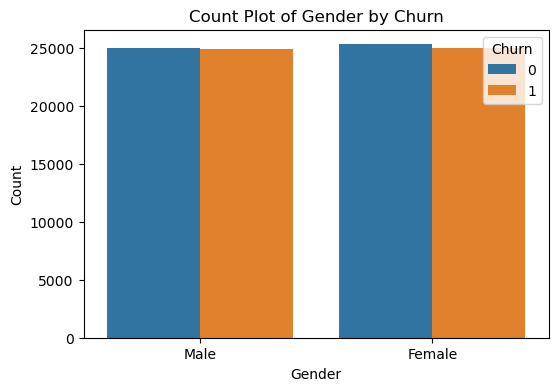

C:\Users\rushi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


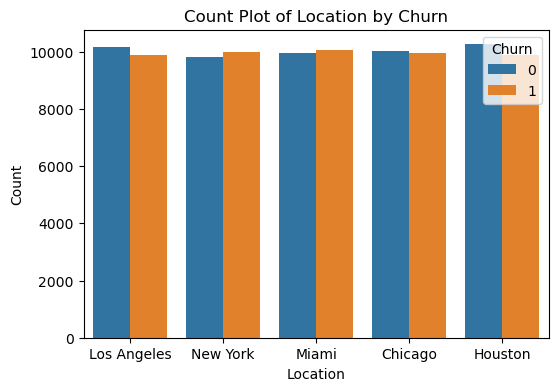

In [16]:
# Count plots for categorical features
categorical_cols = ['Gender', 'Location']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(df[col], hue=df['Churn'])
    plt.title(f'Count Plot of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

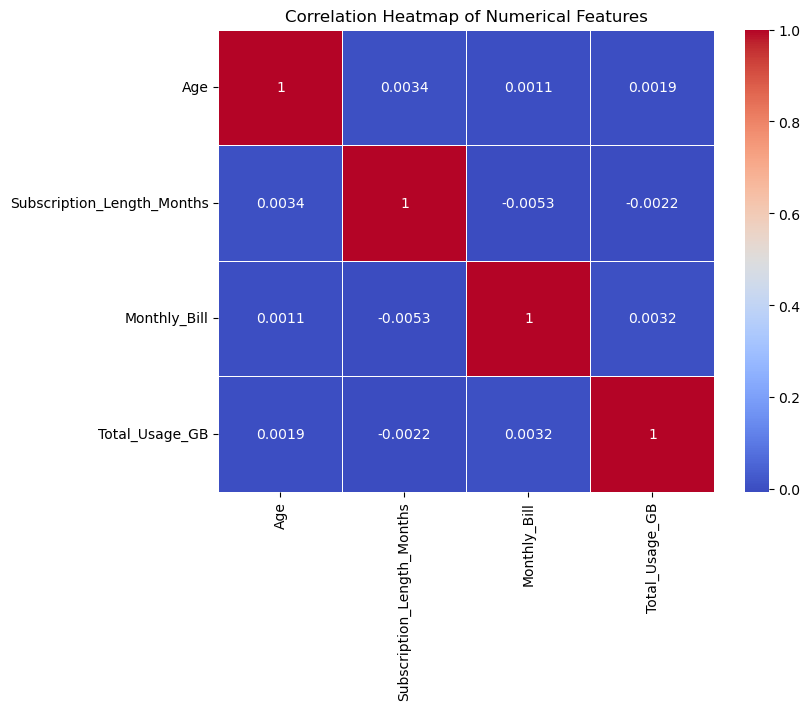

In [17]:
# Correlation heatmap for numerical features
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [18]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [19]:
df.drop(columns=['Name'],inplace=True)

In [20]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

# Categorical to Numerical 

In [21]:
df=pd.get_dummies(df,columns=['Gender','Location'])

In [22]:
df

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,63,17,73.36,236,0,0,1,0,0,1,0,0
1,2,62,1,48.76,172,0,1,0,0,0,0,0,1
2,3,24,5,85.47,460,0,1,0,0,0,1,0,0
3,4,36,3,97.94,297,1,1,0,0,0,0,1,0
4,5,46,19,58.14,266,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,33,23,55.13,226,1,0,1,0,1,0,0,0
99996,99997,62,19,61.65,351,0,1,0,0,0,0,0,1
99997,99998,64,17,96.11,251,1,0,1,1,0,0,0,0
99998,99999,51,20,49.25,434,1,1,0,0,0,0,0,1


In [23]:
df.drop(columns=['Gender_Female'],inplace=True)

In [24]:
df.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,63,17,73.36,236,0,1,0,0,1,0,0
1,2,62,1,48.76,172,0,0,0,0,0,0,1
2,3,24,5,85.47,460,0,0,0,0,1,0,0
3,4,36,3,97.94,297,1,0,0,0,0,1,0
4,5,46,19,58.14,266,0,0,0,0,0,1,0


Dividing the Dataset and Sepreting the target column it

In [33]:
X=df.loc[:,df.columns!='Churn']

#X = pd.DataFrame( columns=['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB','Gender_Male', 'Location_Chicago', 'Location_Houston', 'Location_Los_Angeles', 'Location_Miami', 'Location_New_York'])


In [34]:
Y=df['Churn']

# Dividing dataset into train and testing dataset.

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#  Model: Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr=LogisticRegression()

In [39]:
# Train the model on the training data
lr.fit(x_train,y_train)
# Make predictions on the test data
y_pred=lr.predict(x_test)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.50
Confusion Matrix:
[[10091     0]
 [ 9909     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     10091
           1       0.00      0.00      0.00      9909

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.34     20000
weighted avg       0.25      0.50      0.34     20000



C:\Users\rushi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rushi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model:Random forest classifier

In [41]:
 from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=10)
clf.fit(x_train,y_train)
y_pred2=clf.predict(x_test)

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.50
Confusion Matrix:
[[5296 4795]
 [5246 4663]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     10091
           1       0.49      0.47      0.48      9909

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000




# Hyper parameter Tuning -GridSearchCV


In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [45]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [46]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [47]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [48]:
grid_search.best_params_ 

{'max_features': 10, 'min_samples_split': 3}

In [49]:
cvrf_clf = grid_search.best_estimator_

In [50]:
y_pred4=cvrf_clf.predict(x_test)

# Evaluate the model


In [51]:
confusion_matrix(y_test, y_pred4)


array([[5194, 4897],
       [5059, 4850]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test, y_pred4)
print('accuracy_score:',accuracy_score)

accuracy_score: 0.5022


# Report

In [53]:
report = classification_report(y_test, y_pred4)

print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51     10091
           1       0.50      0.49      0.49      9909

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# Desicion Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier


In [55]:
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(x_train,y_train)
y_pred3=clf_gini.predict(x_test)


# Evaluate the model


In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [57]:
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)
class_report = classification_report(y_test, y_pred3)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.50
Confusion Matrix:
[[9591  500]
 [9422  487]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.95      0.66     10091
           1       0.49      0.05      0.09      9909

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.37     20000
weighted avg       0.50      0.50      0.38     20000



In [58]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

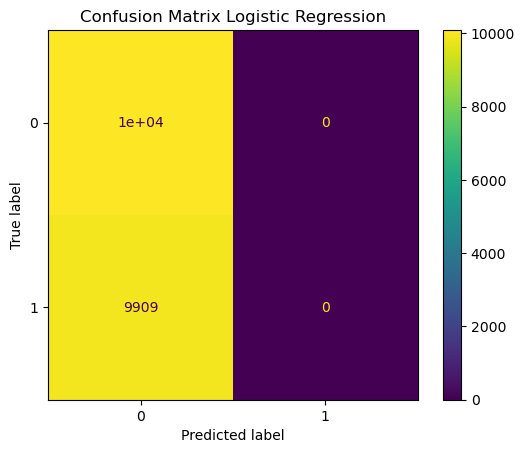

In [59]:
# visualising confusion matrix -Logistic Regression
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.title('Confusion Matrix Logistic Regression')
plt.show()


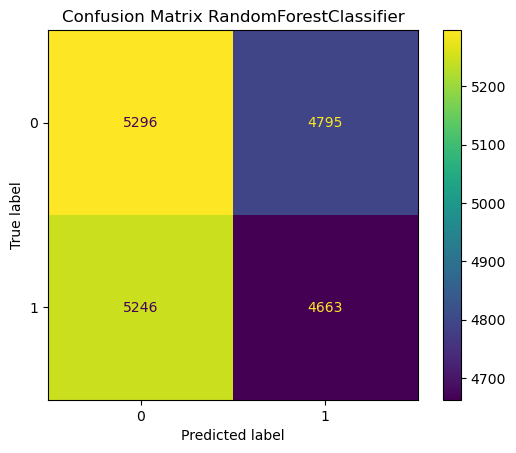

In [60]:
# visualising confusion matrix -Random forest
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred2))
disp.plot()
plt.title('Confusion Matrix RandomForestClassifier')
plt.show()


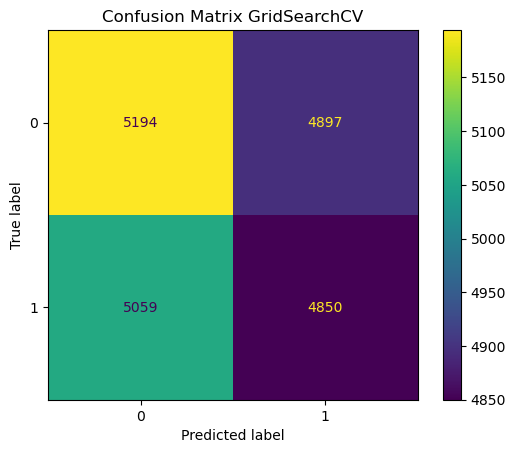

In [61]:
# visualising confusion matrix -GridSearchCV
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred4))
disp.plot()
plt.title('Confusion Matrix GridSearchCV')
plt.show()


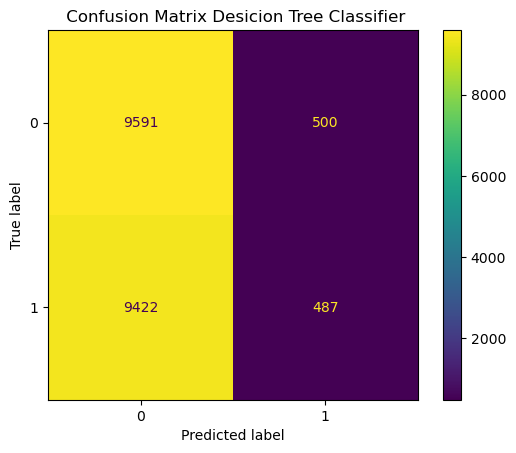

In [62]:
# visualising confusion matrix Desicion Tree Classifier
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred3))
disp.plot()
plt.title(' Confusion Matrix Desicion Tree Classifier')
plt.show()


In [64]:
df.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,63,17,73.36,236,0,1,0,0,1,0,0
1,2,62,1,48.76,172,0,0,0,0,0,0,1
2,3,24,5,85.47,460,0,0,0,0,1,0,0
3,4,36,3,97.94,297,1,0,0,0,0,1,0
4,5,46,19,58.14,266,0,0,0,0,0,1,0


 Logistic Regression(ROC)

In [63]:

sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Logistic Regression(ROC)')
plt.legend(loc='lower right')
plt.show()


SyntaxError: invalid syntax (600962056.py, line 1)

In [ ]:

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier(ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Desicion Tree Classifier(ROC)')
plt.legend(loc='lower right')
plt.show()

# summarization

A brief report summarizing  approach and model selection decisions.
Goal: Predict the existing Customer is Churn or not 
Approach:-

The following Steps are follow
1)Data Importing and preprocessing 

Explore the dataset to understand its structure, check for missing values, and identify potential outliers.

2)Data Preprocessing:

fill the mediun value  based on the nature of the data and the impact on the prediction task.
Convert categorical variables into numerical representations using getdummy method.
3)Ensemble Methods:

Implement and experiment with different ensemble methods, such as  Random Forest and decision tree models
4)Model Training and Evaluation

Split the dataset into training and testing sets.
Train each ensemble model on the training set.
Evaluate the models using appropriate evaluation metrics such as accuracy, precision, recall, F1-score.
5)Model Selection:

Select the ensemble method with the best performance based on the evaluation metrics.
6)Deployment:

Deploy the selected ensemble model to a production environment for real-time predictions.

Model selection decisions

In that model our dataset is balanced then all model shows same accuracy, so rather than accuracy go with confusion matrics and f1 score,By focusing on confusion matrices, the F1 score, and hyperparameter tuning, you are taking a well-informed approach to ensure that your model's performance aligns with your specific goals and requirements, even when working with a balanced dataset. so the our predicion is go with Random forest with hyperparameter tunned


In [ ]:
#import joblib

# Specify the filename where you want to save the grid_search object
#filename = 'grid_search.pkl'

# Use joblib.dump() to save the grid_search object to a file
#joblib.dump(grid_search, filename)
